##### Importing required packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LinReg ML packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
pd.set_option('display.float_format', lambda x : '%.7f' % x)

In [4]:
df = pd.read_csv(r"C:\Users\Pooja\Downloads\insurance_data.csv")

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0000000,male,23.2100000,0.0000000,no,29087.5431300,17.0000000,715428.0000000,4720920.9920000,0.0000000,55784970.0500000,southeast,1121.8739000
1,18.0000000,male,30.1400000,0.0000000,no,39053.6743700,7.0000000,699157.0000000,4329831.6760000,0.0000000,13700885.1900000,southeast,1131.5066000
2,18.0000000,male,33.3300000,0.0000000,no,39023.6275900,19.0000000,702341.0000000,6884860.7740000,0.0000000,73523107.2700000,southeast,1135.9407000
3,18.0000000,male,33.6600000,0.0000000,no,28185.3933200,11.0000000,700250.0000000,4274773.5500000,0.0000000,75819679.6000000,southeast,1136.3994000
4,18.0000000,male,34.1000000,0.0000000,no,14697.8594100,16.0000000,711584.0000000,3787293.9210000,0.0000000,23012320.0100000,southeast,1137.0110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0000000,female,35.5300000,0.0000000,yes,63142.2534600,32.0000000,1091267.0000000,170380500.5000000,2.0000000,3101107370.0000000,northwest,55135.4020900
1334,31.0000000,female,38.0950000,1.0000000,yes,43419.9522700,31.0000000,1107872.0000000,201515184.8000000,2.0000000,3484216117.0000000,northeast,58571.0744800
1335,52.0000000,male,34.4850000,3.0000000,yes,52458.9235300,25.0000000,1092005.0000000,223644981.3000000,2.0000000,3640806683.0000000,northwest,60021.3989700
1336,45.0000000,male,30.3600000,0.0000000,yes,69927.5166400,34.0000000,1106821.0000000,252892382.6000000,3.0000000,4006358505.0000000,southeast,62592.8730900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [8]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.0000000,1335.0000000,1333.0000000,1324.0000000,1332.0000000,1335.0000000,1334.0000000,1336.0000000,1332.0000000,1338.0000000
mean,39.3100075,30.6651124,1.0907727,33361.3271801,15.2162162,910004.6958801,15841791.9440309,1.0606287,369684859.7033724,13270.4222651
std,14.0348179,6.1016898,1.2018556,15617.2883370,7.4677232,91886.1195922,26693047.7376188,0.5335831,566884292.1106706,12110.0112367
min,18.0000000,15.9600000,0.0000000,1920.1362680,1.0000000,695430.0000000,29452.5329600,0.0000000,2747071.9080000,1121.8739000
25%,27.0000000,26.3025000,0.0000000,20768.8603900,9.0000000,847199.5000000,4077633.1372500,1.0000000,77019322.7925000,4740.2871500
50%,39.0000000,30.4000000,1.0000000,33700.3106750,15.0000000,914300.0000000,7490336.9050000,1.0000000,141936093.2000000,9382.0330000
75%,51.0000000,34.6875000,2.0000000,45052.3319575,20.0000000,971684.0000000,10840822.0950000,1.0000000,324349867.3750000,16639.9125150
max,64.0000000,53.1300000,5.0000000,77277.9884800,40.0000000,1107872.0000000,261631699.3000000,3.0000000,4117196637.0000000,63770.4280100


In [9]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [10]:
df.isnull().sum().sum()

52

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [13]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

#### Null Values
##### Numerical Column :  Mean
##### Categorical Column : Mode

In [15]:
for x in df.columns:
    if df[x].dtype == 'object':
        df[x].fillna(df[x].mode()[0], inplace = True)
    else:
        df[x].fillna(df[x].mean(), inplace = True)

In [16]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

##### Outliers detection

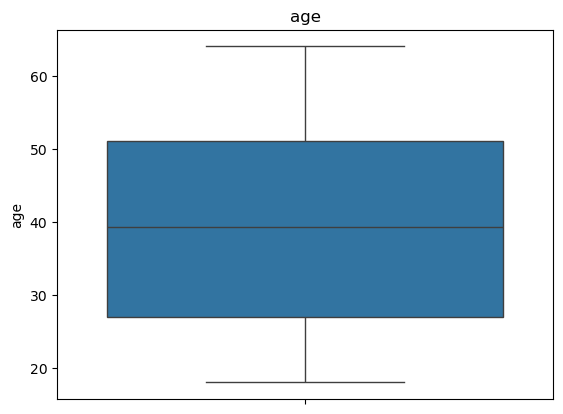

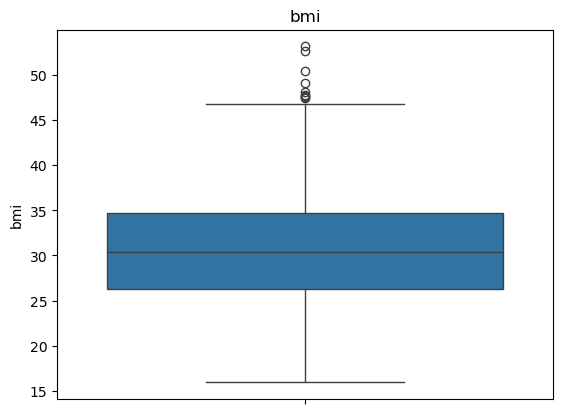

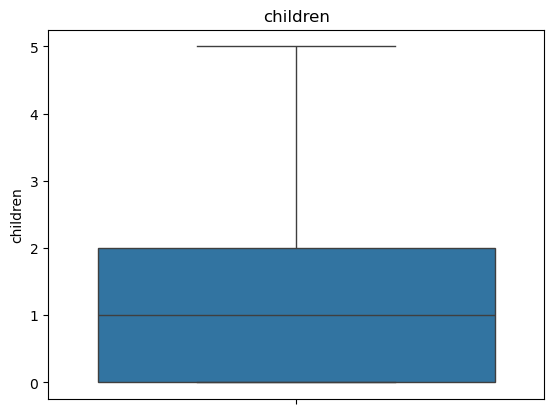

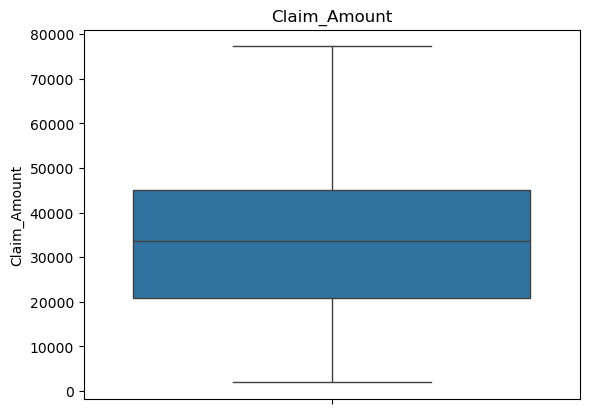

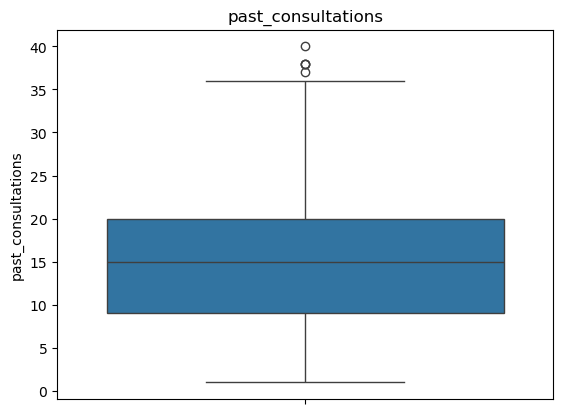

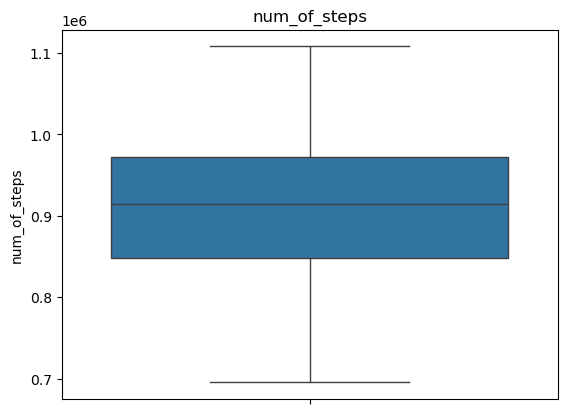

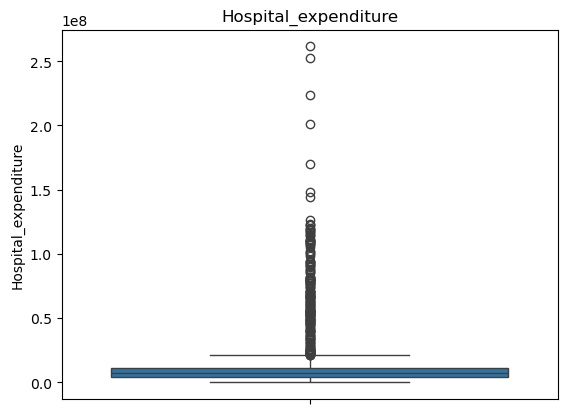

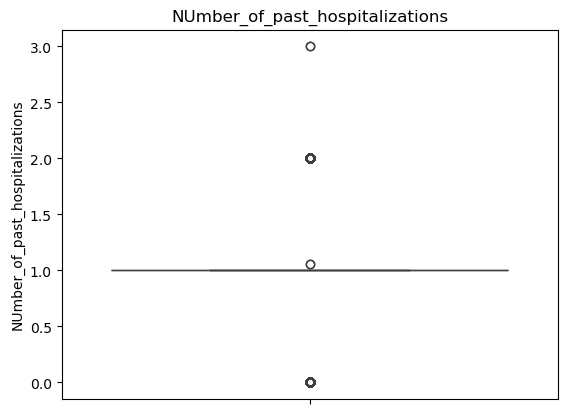

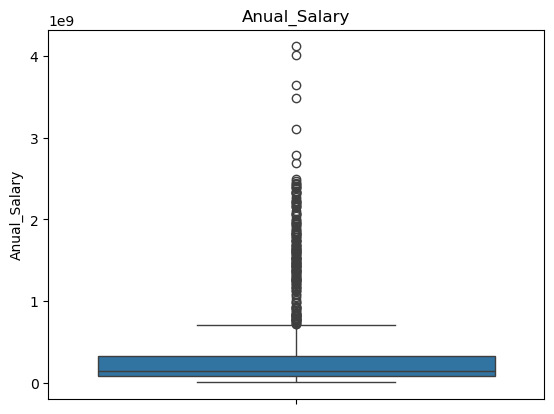

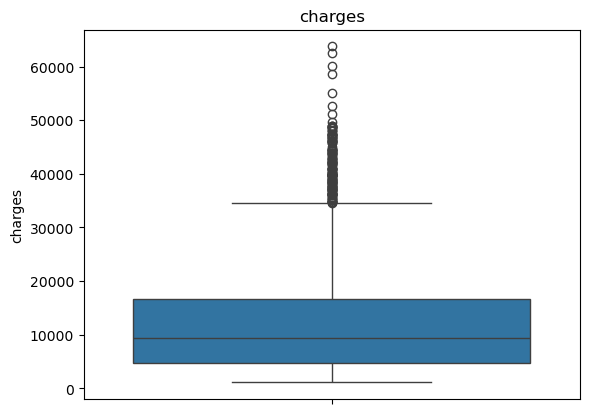

In [18]:
for x in df.columns:
    if df[x].dtype != 'object':
        sns.boxplot(df[x])
        plt.title(x)
        plt.show()

In [19]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1338.0000000,1338.0000000,1338.0000000,1338.0000000,1338.0000000,1338.0000000,1338.0000000,1338.0000000,1338.0000000,1338.0000000
mean,39.3100075,30.6651124,1.0907727,33361.3271801,15.2162162,910004.6958801,15841791.9440309,1.0606287,369684859.7033724,13270.4222651
std,13.9875005,6.0948403,1.1996062,15535.3072545,7.4509480,91782.9733075,26653088.0629125,0.5331839,565610870.1532313,12110.0112367
min,18.0000000,15.9600000,0.0000000,1920.1362680,1.0000000,695430.0000000,29452.5329600,0.0000000,2747071.9080000,1121.8739000
25%,27.0000000,26.3150000,0.0000000,20947.6451975,9.0000000,847489.7500000,4084941.0357500,1.0000000,77550854.6350000,4740.2871500
50%,39.3100075,30.4000000,1.0000000,33611.2860650,15.0000000,914015.5000000,7500985.0805000,1.0000000,142275646.0500000,9382.0330000
75%,51.0000000,34.6562500,2.0000000,44978.8731875,20.0000000,971510.0000000,10901869.6250000,1.0000000,329871291.2500000,16639.9125150
max,64.0000000,53.1300000,5.0000000,77277.9884800,40.0000000,1107872.0000000,261631699.3000000,3.0000000,4117196637.0000000,63770.4280100


In [20]:
df.shape

(1338, 13)

In [21]:
for x in df.columns:
    if df[x].dtype == 'object' or x == 'charges':
        continue
        
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[x] >= lower_bound) & (df[x] <= upper_bound)]

In [22]:
df.shape

(881, 13)

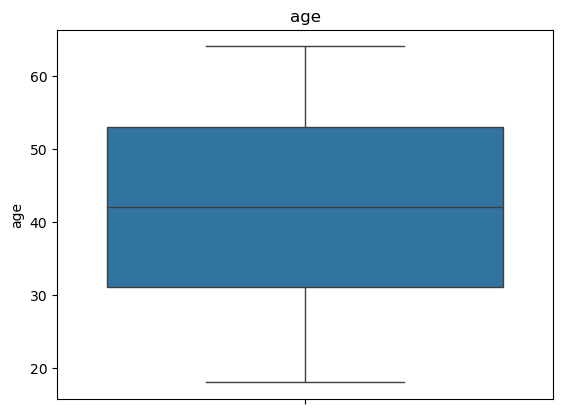

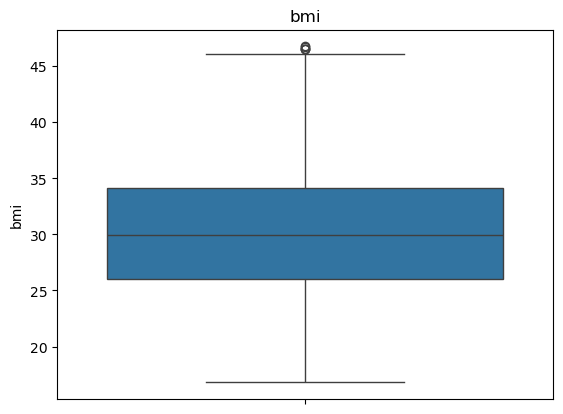

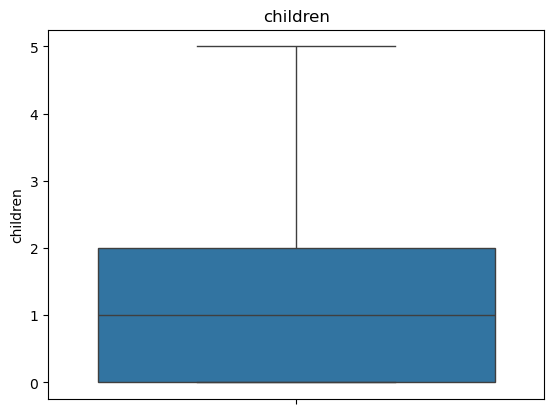

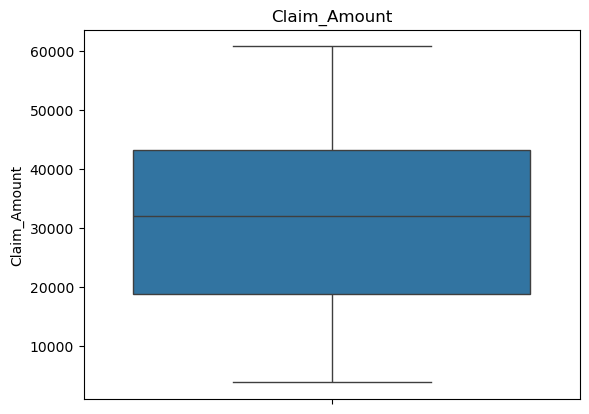

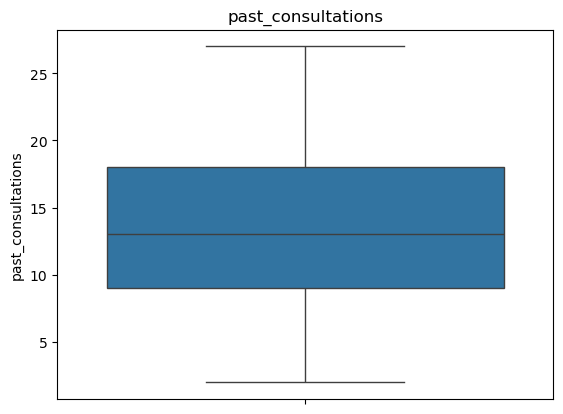

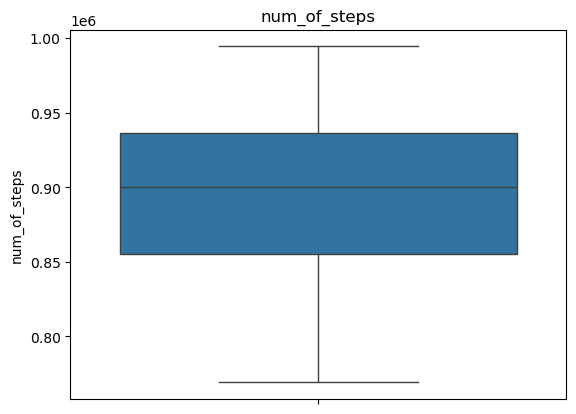

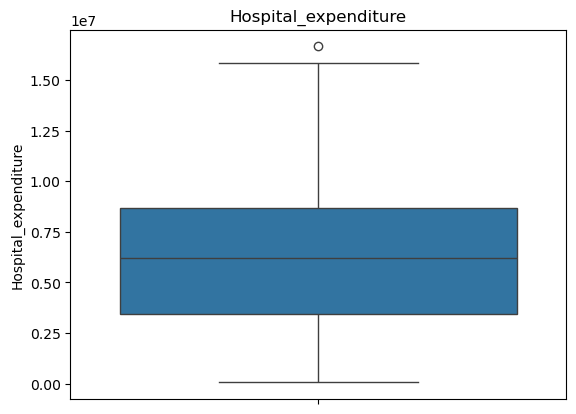

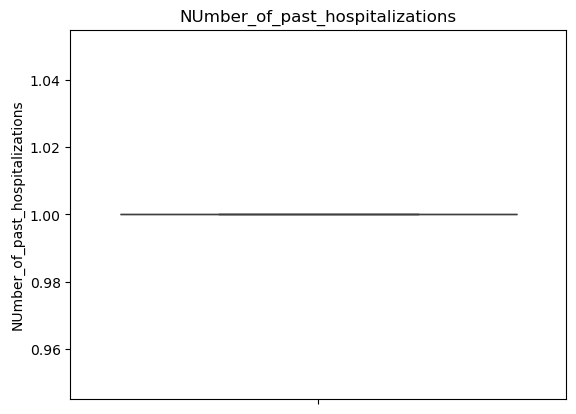

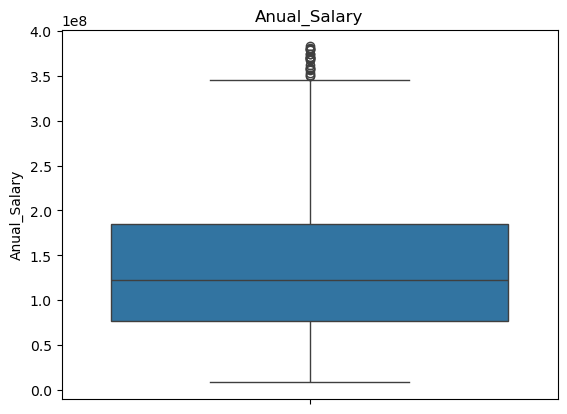

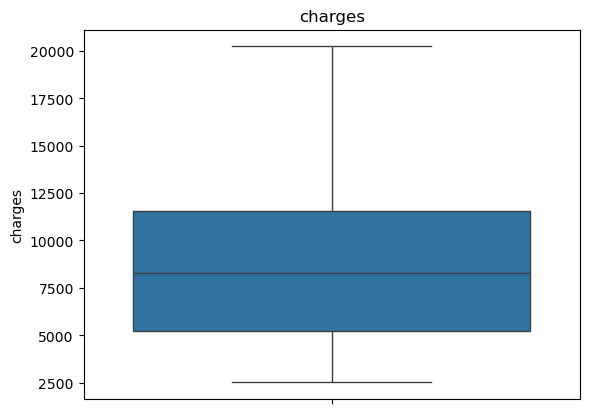

In [23]:
for x in df.columns:
    if df[x].dtype != 'object':
        sns.boxplot(df[x])
        plt.title(x)
        plt.show()

#### Feature Selection

Features are the independent columns.
Independent columns should not be correlated with eachother to avoid fluctuation and multicollinearity can affect the model accuracy.

#### VIF (Variance Inflation Factor)

VIF helps to detect multicollinearity among all the columns.
if VIF >= 6 means that col can be dropped as it has high multicollinearity.

In [26]:
numcol_list = []
for x in df.columns:
    if df[x].dtype != 'object' and x != 'charges':
        numcol_list.append(x)

numcol_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary']

In [27]:
# we already imported the VIF from statsmodels.stats.outlier_influence in the 1st step itself. 
# we will be using it here

In [28]:
dummy = df[numcol_list]
dummy

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary
151,25.0000000,27.5500000,0.0000000,39148.9549500,10.0000000,780652.0000000,8614147.4670000,1.0000000,54526009.3300000
152,22.0000000,20.2350000,0.0000000,41547.5253600,13.0000000,802627.0000000,249159.4253000,1.0000000,16718473.1300000
153,25.0000000,35.6250000,0.0000000,39660.6019300,12.0000000,770773.0000000,3043322.7950000,1.0000000,48526941.6800000
154,20.0000000,31.1300000,2.0000000,16032.8714800,7.0000000,769255.0000000,1599068.7570000,1.0000000,24412621.8500000
155,21.0000000,17.4000000,1.0000000,31090.9897700,21.0000000,778769.0000000,3015364.9450000,1.0000000,58535788.8000000
...,...,...,...,...,...,...,...,...,...
1046,29.0000000,27.9400000,1.0000000,51168.2547400,23.0000000,993751.0000000,16659821.7000000,1.0000000,371218761.2000000
1048,31.0000000,25.9000000,3.0000000,46619.4023000,27.0000000,989387.0000000,13619378.0700000,1.0000000,381289534.6000000
1050,31.0000000,29.8100000,0.0000000,24382.5805600,21.0000000,973924.0000000,10289906.7600000,1.0000000,374530950.6000000
1062,43.0000000,20.0450000,2.0000000,21596.4384600,10.0000000,994419.0000000,10830301.1400000,1.0000000,369684859.7033724


In [29]:
vif_data = pd.DataFrame()
vif_data['Feature'] = dummy.columns
vif_data['VIF'] = [variance_inflation_factor(dummy.values, i) for i in range(len(dummy.columns))]

In [30]:
vif_data

,Feature,VIF
0,age,2.1961944
1,bmi,1.0527174
2,children,1.0765228
3,Claim_Amount,1.0350334
4,past_consultations,1.0739890
5,num_of_steps,5.8820737
6,Hospital_expenditure,1.1732085
7,NUmber_of_past_hospitalizations,1393.1697238
8,Anual_Salary,3.9836777


In [31]:
df = df.drop(['NUmber_of_past_hospitalizations'], axis = 1)
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary,region,charges
151,25.0000000,male,27.5500000,0.0000000,no,39148.9549500,10.0000000,780652.0000000,8614147.4670000,54526009.3300000,northwest,2523.1695000
152,22.0000000,female,20.2350000,0.0000000,no,41547.5253600,13.0000000,802627.0000000,249159.4253000,16718473.1300000,northwest,2527.8186500
153,25.0000000,male,35.6250000,0.0000000,no,39660.6019300,12.0000000,770773.0000000,3043322.7950000,48526941.6800000,northwest,2534.3937500
154,20.0000000,male,31.1300000,2.0000000,no,16032.8714800,7.0000000,769255.0000000,1599068.7570000,24412621.8500000,southeast,2566.4707000
155,21.0000000,female,17.4000000,1.0000000,no,31090.9897700,21.0000000,778769.0000000,3015364.9450000,58535788.8000000,southwest,2585.2690000
...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0000000,female,27.9400000,1.0000000,yes,51168.2547400,23.0000000,993751.0000000,16659821.7000000,371218761.2000000,southeast,19107.7796000
1048,31.0000000,male,25.9000000,3.0000000,yes,46619.4023000,27.0000000,989387.0000000,13619378.0700000,381289534.6000000,southwest,19199.9440000
1050,31.0000000,male,29.8100000,0.0000000,yes,24382.5805600,21.0000000,973924.0000000,10289906.7600000,374530950.6000000,southeast,19350.3689000
1062,43.0000000,female,20.0450000,2.0000000,yes,21596.4384600,10.0000000,994419.0000000,10830301.1400000,369684859.7033724,northeast,19798.0545500


In [32]:
numcol_list = []
for x in df.columns:
    if df[x].dtype != 'object' and x != 'charges':
        numcol_list.append(x)

numcol_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'Anual_Salary']

In [33]:
dummy = df[numcol_list]
dummy

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,Anual_Salary
151,25.0000000,27.5500000,0.0000000,39148.9549500,10.0000000,780652.0000000,8614147.4670000,54526009.3300000
152,22.0000000,20.2350000,0.0000000,41547.5253600,13.0000000,802627.0000000,249159.4253000,16718473.1300000
153,25.0000000,35.6250000,0.0000000,39660.6019300,12.0000000,770773.0000000,3043322.7950000,48526941.6800000
154,20.0000000,31.1300000,2.0000000,16032.8714800,7.0000000,769255.0000000,1599068.7570000,24412621.8500000
155,21.0000000,17.4000000,1.0000000,31090.9897700,21.0000000,778769.0000000,3015364.9450000,58535788.8000000
...,...,...,...,...,...,...,...,...
1046,29.0000000,27.9400000,1.0000000,51168.2547400,23.0000000,993751.0000000,16659821.7000000,371218761.2000000
1048,31.0000000,25.9000000,3.0000000,46619.4023000,27.0000000,989387.0000000,13619378.0700000,381289534.6000000
1050,31.0000000,29.8100000,0.0000000,24382.5805600,21.0000000,973924.0000000,10289906.7600000,374530950.6000000
1062,43.0000000,20.0450000,2.0000000,21596.4384600,10.0000000,994419.0000000,10830301.1400000,369684859.7033724


In [34]:
numcol_list = []
for x in df.columns:
    if df[x].dtype != 'object' and x != 'charges':
        numcol_list.append(x)

numcol_list

['age',
 'bmi',
 'children',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'Anual_Salary']

In [35]:
vif_data = pd.DataFrame()
vif_data['Feature'] = dummy.columns
vif_data['VIF'] = [variance_inflation_factor(dummy.values, i) for i in range(len(dummy.columns))]

In [36]:
vif_data

,Feature,VIF
0,age,16.3577079
1,bmi,26.8681433
2,children,2.0693450
3,Claim_Amount,5.8647526
4,past_consultations,6.4634878
5,num_of_steps,58.3763443
6,Hospital_expenditure,5.4230175
7,Anual_Salary,6.0007032


In [37]:
df = df.drop(['num_of_steps'], axis = 1)
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
151,25.0000000,male,27.5500000,0.0000000,no,39148.9549500,10.0000000,8614147.4670000,54526009.3300000,northwest,2523.1695000
152,22.0000000,female,20.2350000,0.0000000,no,41547.5253600,13.0000000,249159.4253000,16718473.1300000,northwest,2527.8186500
153,25.0000000,male,35.6250000,0.0000000,no,39660.6019300,12.0000000,3043322.7950000,48526941.6800000,northwest,2534.3937500
154,20.0000000,male,31.1300000,2.0000000,no,16032.8714800,7.0000000,1599068.7570000,24412621.8500000,southeast,2566.4707000
155,21.0000000,female,17.4000000,1.0000000,no,31090.9897700,21.0000000,3015364.9450000,58535788.8000000,southwest,2585.2690000
...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0000000,female,27.9400000,1.0000000,yes,51168.2547400,23.0000000,16659821.7000000,371218761.2000000,southeast,19107.7796000
1048,31.0000000,male,25.9000000,3.0000000,yes,46619.4023000,27.0000000,13619378.0700000,381289534.6000000,southwest,19199.9440000
1050,31.0000000,male,29.8100000,0.0000000,yes,24382.5805600,21.0000000,10289906.7600000,374530950.6000000,southeast,19350.3689000
1062,43.0000000,female,20.0450000,2.0000000,yes,21596.4384600,10.0000000,10830301.1400000,369684859.7033724,northeast,19798.0545500


In [38]:
numcol_list = []
for x in df.columns:
    if df[x].dtype != 'object' and x != 'charges':
        numcol_list.append(x)

print(numcol_list)

dummy = df[numcol_list]
print(dummy)

vif_data = pd.DataFrame()
vif_data['Feature'] = dummy.columns
vif_data['VIF'] = [variance_inflation_factor(dummy.values, i) for i in range(len(dummy.columns))]

print(vif_data)

['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary']
            age        bmi  children  Claim_Amount  past_consultations  \
151  25.0000000 27.5500000 0.0000000 39148.9549500          10.0000000   
152  22.0000000 20.2350000 0.0000000 41547.5253600          13.0000000   
153  25.0000000 35.6250000 0.0000000 39660.6019300          12.0000000   
154  20.0000000 31.1300000 2.0000000 16032.8714800           7.0000000   
155  21.0000000 17.4000000 1.0000000 31090.9897700          21.0000000   
...         ...        ...       ...           ...                 ...   
1046 29.0000000 27.9400000 1.0000000 51168.2547400          23.0000000   
1048 31.0000000 25.9000000 3.0000000 46619.4023000          27.0000000   
1050 31.0000000 29.8100000 0.0000000 24382.5805600          21.0000000   
1062 43.0000000 20.0450000 2.0000000 21596.4384600          10.0000000   
1069 35.0000000 28.0250000 0.0000000 17200.1458600          15.0000000   

      

In [39]:
df = df.drop(['bmi'], axis = 1)
df

,age,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
151,25.0000000,male,0.0000000,no,39148.9549500,10.0000000,8614147.4670000,54526009.3300000,northwest,2523.1695000
152,22.0000000,female,0.0000000,no,41547.5253600,13.0000000,249159.4253000,16718473.1300000,northwest,2527.8186500
153,25.0000000,male,0.0000000,no,39660.6019300,12.0000000,3043322.7950000,48526941.6800000,northwest,2534.3937500
154,20.0000000,male,2.0000000,no,16032.8714800,7.0000000,1599068.7570000,24412621.8500000,southeast,2566.4707000
155,21.0000000,female,1.0000000,no,31090.9897700,21.0000000,3015364.9450000,58535788.8000000,southwest,2585.2690000
...,...,...,...,...,...,...,...,...,...,...
1046,29.0000000,female,1.0000000,yes,51168.2547400,23.0000000,16659821.7000000,371218761.2000000,southeast,19107.7796000
1048,31.0000000,male,3.0000000,yes,46619.4023000,27.0000000,13619378.0700000,381289534.6000000,southwest,19199.9440000
1050,31.0000000,male,0.0000000,yes,24382.5805600,21.0000000,10289906.7600000,374530950.6000000,southeast,19350.3689000
1062,43.0000000,female,2.0000000,yes,21596.4384600,10.0000000,10830301.1400000,369684859.7033724,northeast,19798.0545500


In [40]:
numcol_list = []
for x in df.columns:
    if df[x].dtype != 'object' and x != 'charges':
        numcol_list.append(x)

print(numcol_list)

dummy = df[numcol_list]
print(dummy)

vif_data = pd.DataFrame()
vif_data['Feature'] = dummy.columns
vif_data['VIF'] = [variance_inflation_factor(dummy.values, i) for i in range(len(dummy.columns))]

print(vif_data)

['age', 'children', 'Claim_Amount', 'past_consultations', 'Hospital_expenditure', 'Anual_Salary']
            age  children  Claim_Amount  past_consultations  \
151  25.0000000 0.0000000 39148.9549500          10.0000000   
152  22.0000000 0.0000000 41547.5253600          13.0000000   
153  25.0000000 0.0000000 39660.6019300          12.0000000   
154  20.0000000 2.0000000 16032.8714800           7.0000000   
155  21.0000000 1.0000000 31090.9897700          21.0000000   
...         ...       ...           ...                 ...   
1046 29.0000000 1.0000000 51168.2547400          23.0000000   
1048 31.0000000 3.0000000 46619.4023000          27.0000000   
1050 31.0000000 0.0000000 24382.5805600          21.0000000   
1062 43.0000000 2.0000000 21596.4384600          10.0000000   
1069 35.0000000 0.0000000 17200.1458600          15.0000000   

      Hospital_expenditure      Anual_Salary  
151        8614147.4670000  54526009.3300000  
152         249159.4253000  16718473.1300000  
153 

In [41]:
df = df.drop(['age'], axis = 1)
df

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
151,male,0.0000000,no,39148.9549500,10.0000000,8614147.4670000,54526009.3300000,northwest,2523.1695000
152,female,0.0000000,no,41547.5253600,13.0000000,249159.4253000,16718473.1300000,northwest,2527.8186500
153,male,0.0000000,no,39660.6019300,12.0000000,3043322.7950000,48526941.6800000,northwest,2534.3937500
154,male,2.0000000,no,16032.8714800,7.0000000,1599068.7570000,24412621.8500000,southeast,2566.4707000
155,female,1.0000000,no,31090.9897700,21.0000000,3015364.9450000,58535788.8000000,southwest,2585.2690000
...,...,...,...,...,...,...,...,...,...
1046,female,1.0000000,yes,51168.2547400,23.0000000,16659821.7000000,371218761.2000000,southeast,19107.7796000
1048,male,3.0000000,yes,46619.4023000,27.0000000,13619378.0700000,381289534.6000000,southwest,19199.9440000
1050,male,0.0000000,yes,24382.5805600,21.0000000,10289906.7600000,374530950.6000000,southeast,19350.3689000
1062,female,2.0000000,yes,21596.4384600,10.0000000,10830301.1400000,369684859.7033724,northeast,19798.0545500


In [42]:
numcol_list = []
for x in df.columns:
    if df[x].dtype != 'object' and x != 'charges':
        numcol_list.append(x)

dummy = df[numcol_list]

vif_data = pd.DataFrame()
vif_data['Features'] = dummy.columns
vif_data['VIF'] = [variance_inflation_factor(dummy.values, i) for i in range(len(dummy.columns))]

print(vif_data)

               Features       VIF
0              children 1.8272983
1          Claim_Amount 4.2908277
2    past_consultations 4.9423385
3  Hospital_expenditure 4.6240253
4          Anual_Salary 4.9220266


In [43]:
df

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
151,male,0.0000000,no,39148.9549500,10.0000000,8614147.4670000,54526009.3300000,northwest,2523.1695000
152,female,0.0000000,no,41547.5253600,13.0000000,249159.4253000,16718473.1300000,northwest,2527.8186500
153,male,0.0000000,no,39660.6019300,12.0000000,3043322.7950000,48526941.6800000,northwest,2534.3937500
154,male,2.0000000,no,16032.8714800,7.0000000,1599068.7570000,24412621.8500000,southeast,2566.4707000
155,female,1.0000000,no,31090.9897700,21.0000000,3015364.9450000,58535788.8000000,southwest,2585.2690000
...,...,...,...,...,...,...,...,...,...
1046,female,1.0000000,yes,51168.2547400,23.0000000,16659821.7000000,371218761.2000000,southeast,19107.7796000
1048,male,3.0000000,yes,46619.4023000,27.0000000,13619378.0700000,381289534.6000000,southwest,19199.9440000
1050,male,0.0000000,yes,24382.5805600,21.0000000,10289906.7600000,374530950.6000000,southeast,19350.3689000
1062,female,2.0000000,yes,21596.4384600,10.0000000,10830301.1400000,369684859.7033724,northeast,19798.0545500


In [44]:
# encoding

In [45]:
le = LabelEncoder()

for x in df.columns:
    if df[x].dtype == 'object':
        df[x] = le.fit_transform(df[x])

df

,sex,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary,region,charges
151,1,0.0000000,0,39148.9549500,10.0000000,8614147.4670000,54526009.3300000,1,2523.1695000
152,0,0.0000000,0,41547.5253600,13.0000000,249159.4253000,16718473.1300000,1,2527.8186500
153,1,0.0000000,0,39660.6019300,12.0000000,3043322.7950000,48526941.6800000,1,2534.3937500
154,1,2.0000000,0,16032.8714800,7.0000000,1599068.7570000,24412621.8500000,2,2566.4707000
155,0,1.0000000,0,31090.9897700,21.0000000,3015364.9450000,58535788.8000000,3,2585.2690000
...,...,...,...,...,...,...,...,...,...
1046,0,1.0000000,1,51168.2547400,23.0000000,16659821.7000000,371218761.2000000,2,19107.7796000
1048,1,3.0000000,1,46619.4023000,27.0000000,13619378.0700000,381289534.6000000,3,19199.9440000
1050,1,0.0000000,1,24382.5805600,21.0000000,10289906.7600000,374530950.6000000,2,19350.3689000
1062,0,2.0000000,1,21596.4384600,10.0000000,10830301.1400000,369684859.7033724,0,19798.0545500


#### Model Building

In [47]:
X = df.drop(columns = 'charges')
y = df['charges']


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1)

In [111]:
y_train.shape

(704,)

In [113]:
X_test.shape

(177, 8)

In [115]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = lin_reg.predict(X_test)

In [119]:
r2_score(y_test, y_pred)

0.8614700995505356

In [121]:
mse = mean_squared_error(y_test, y_pred)
mse

2332662.649737574

In [123]:
rmse = np.sqrt(mse)
rmse

1527.3056831353617

#### Regression plot

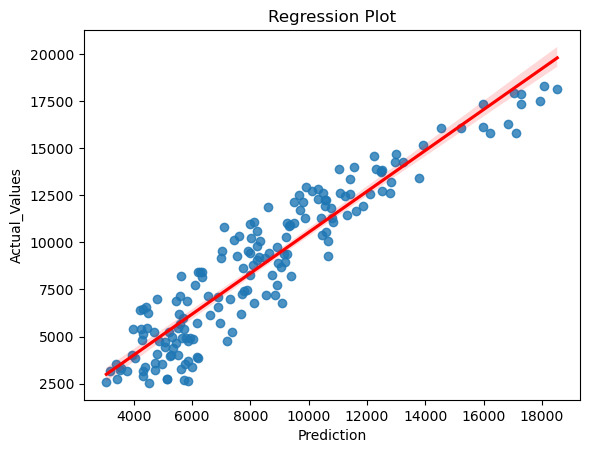

In [134]:
sns.regplot(x = y_pred, y = y_test, line_kws = {'color' : 'red'})
plt.xlabel('Prediction')
plt.ylabel('Actual_Values')
plt.title('Regression Plot')
plt.show()

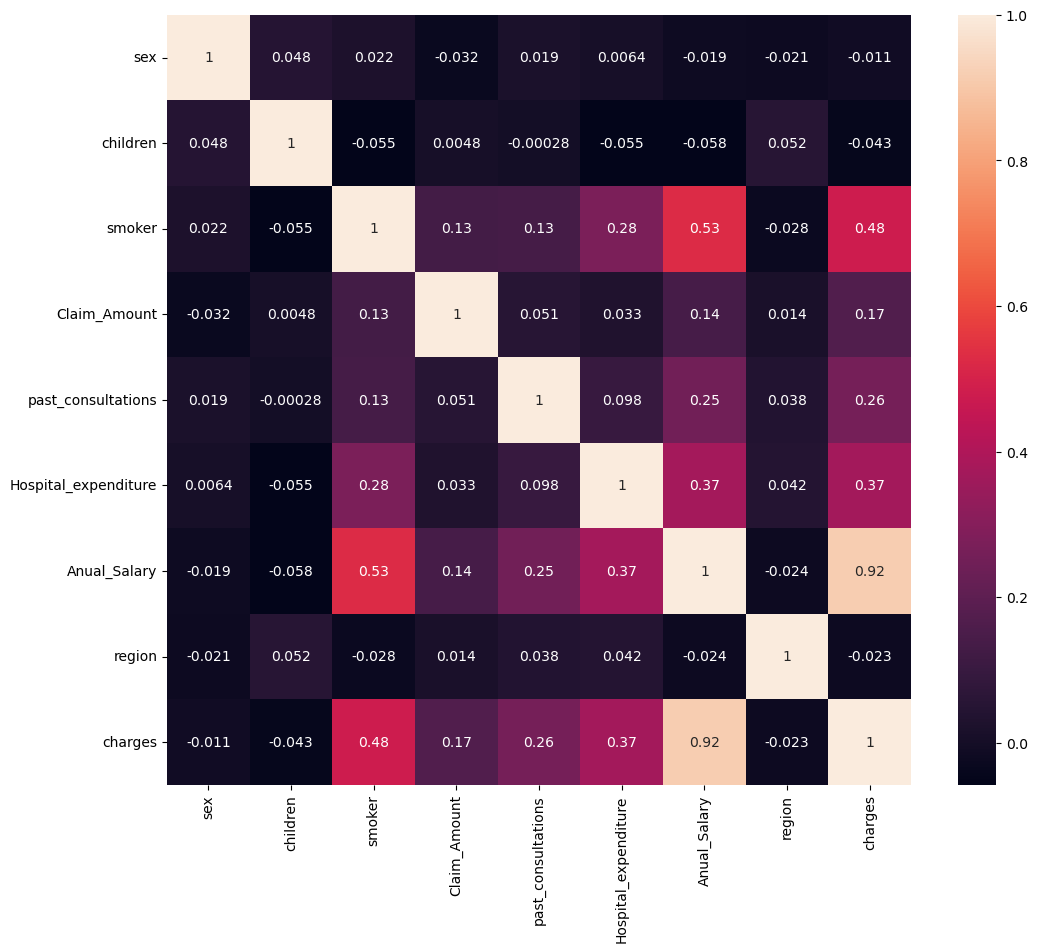

In [132]:
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

### To predict a new charge for a new entry outside of the dataframe we trained and tested by taking inputs

In [157]:
sex = 1
children = 1
smoker = 0
Claim_Amount = 23000
past_consultations = 0
Hospital_expenditure = 23000
Anual_Salary = 1400000
region = 2

In [159]:
new_pred = lin_reg.predict([[sex, children, smoker, Claim_Amount, past_consultations, Hospital_expenditure, Anual_Salary, region]])
new_pred

array([1873.87881127])